# Two-Body Gravitational Orbits
Uses an Orbit class and Lagrange Equations to describe the motion of two orbitting bodies

## Lagrange Equation
The Lagrangian for the two-body system is:

$\begin{align}
  \mathcal{L} = \frac12 m_1 \dot x_1^2 + \frac12 m_1 \dot y_1^2 + \frac12 m_2 \dot x_2^2 + \frac12 m_2 \dot y_2^2 - \frac{G m_1 m_2}{r^2}
\end{align}$

## Euler Lagrange Equations
The Euler-Lagrange is:

$\begin{align}
 r = [(x_1 - x_2)^2 + (y_1 - y_2)]^\frac12
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 \ddot x_1 = \frac{-G m_2 (x_1 - x_2)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 \ddot x_2 = \frac{G m_1 (x_1 - x_2)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 \ddot y_1 = \frac{-G m_2 (y_1 - y_2)}{r^3}
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 \ddot y_2 = \frac{G m_1 (y_1 - y_2)}{r^3}
\end{align}$

Now we can make our orbits!

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [2]:
class Orbit():
    """
    This class uses Lagrange Equations to create two bodies in orbit
    Parameters:
    G is the gravitational constant
    m1, m2 are the masses of the bodies respectively
    """
    def __init__(self, G = 1., m1 = 1., m2 = 1.):
        
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
        
    def dy_dt(self, t, y):
        """
        This function returns the right hand side of the differential equation:
        [dx_1_dot/dt, dx1_double_dot/dt, dx2_dot/dt, dx2_double_dot/dt, 
        dy1_dot/dt, dy1_double_dot/dt, dy2_dot/dt, dy2_double_dot/dt]
        
        Parameters:
        y[0] = x1
        y[1] = x1_dot
        y[2] = x2
        y[3] = x2_dot
        y[4] = y1
        y[5] = y1_dot
        y[6] = y2
        y[7] = y2_dot
        """
        
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = y
        r = (((x1-x2)**2) + ((y1-y2)**2))**0.5

        
        x1_dot = x1_dot
        x2_dot = x2_dot
        y1_dot = y1_dot
        y2_dot = y2_dot
        
        x1_double_dot = -self.G*self.m2*(x1-x2) / r**3
        x2_double_dot = self.G*self.m1*(x1-x2) / r**3
        y1_double_dot = -self.G*self.m2*(y1-y2) / r**3
        y2_double_dot = self.G*self.m1*(y1-y2) / r**3
        
        return x1_dot, x1_double_dot, x2_dot, x2_double_dot, y1_dot, y1_double_dot, y2_dot, y2_double_dot
        
        
    def Lagrange():
        """
        This function is just to show the Lagrangian that was 
        used for the other functions.
        """

        T = (0.5*self.m1*x1_dot**2) + (0.5*self.m1*y1_dot**2) + (0.5*self.m2*x2_dot**2) + (0.5*self.m2*y2_dot**2)
        
        U = -(self.G * self.m1 * self.m2) / r**2
        
        
    def solve_ode(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = solution.y

        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot

In [3]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [5]:
#Labels and conditions
x_vs_y_labels = (r'$x$', r'$y$')

t_start = 0.
t_end = 500.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 1.
m1 = 10.
m2 = 10.

#make the orbit 
O1 = Orbit(G=G, m1=m1, m2=m2)

(<matplotlib.axes._subplots.AxesSubplot at 0x277fa9c70f0>,
 <matplotlib.lines.Line2D at 0x277fd0c6828>)

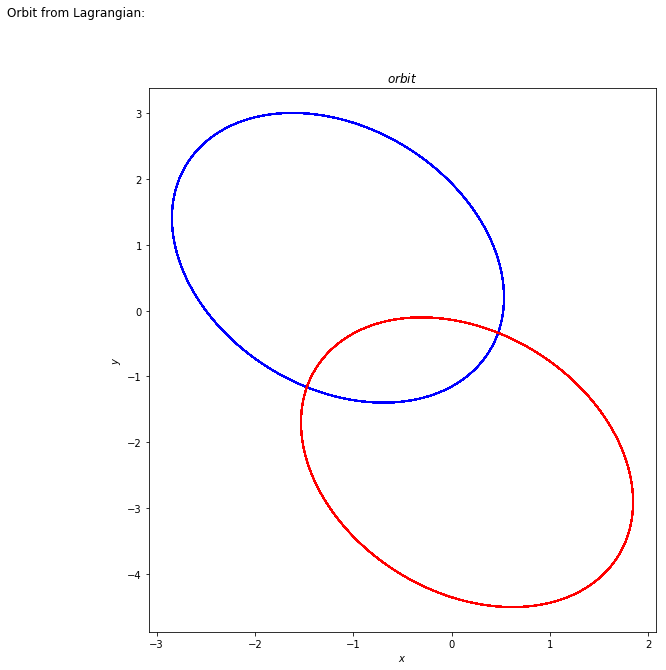

In [6]:
#setting initial conditions
x1_0= -2.5
x1_dot_0 = -0.5
x2_0 = 1.5
x2_dot_0 = -(m1/m2) * x1_dot_0
y1_0 = 0.0
y1_dot_0 = 1.0
y2_0 = -1.5
y2_dot_0 = -(m1/m2) * y1_dot_0
x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = O1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)


#plotting
fig = plt.figure(figsize=(20,10))
overall_title = 'Orbit from Lagrangian:  '
fig.suptitle(overall_title, va='baseline')
    
#x vs y plot 
ax_a = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop],
            axis_labels=x_vs_y_labels,
            color='blue',
            label=None, 
            title=r'$orbit$', 
            ax=ax_a)  
plot_y_vs_x(x2[start : stop], y2[start : stop],
            axis_labels=x_vs_y_labels,
            color='red',
            label=None, 
            title=r'$orbit$', 
            ax=ax_a)

We can see two bodies orbiting another in this plot. Incredible!

## Two bodies m1>>m2
Let's take a look at something where one mass is much greater than the other, thus, it should not move very much.

In [15]:
#conditions for second plot
x_vs_y_labels = (r'$x$', r'$y$')

t_start = 0.
t_end = 500.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 1.
m1 = 1000. #mass 1 is much greater than mass 2
m2 = 10.

#make the orbit 
O1 = Orbit(G=G, m1=m1, m2=m2)

(<matplotlib.axes._subplots.AxesSubplot at 0x277fd02f550>,
 <matplotlib.lines.Line2D at 0x277fd02f828>)

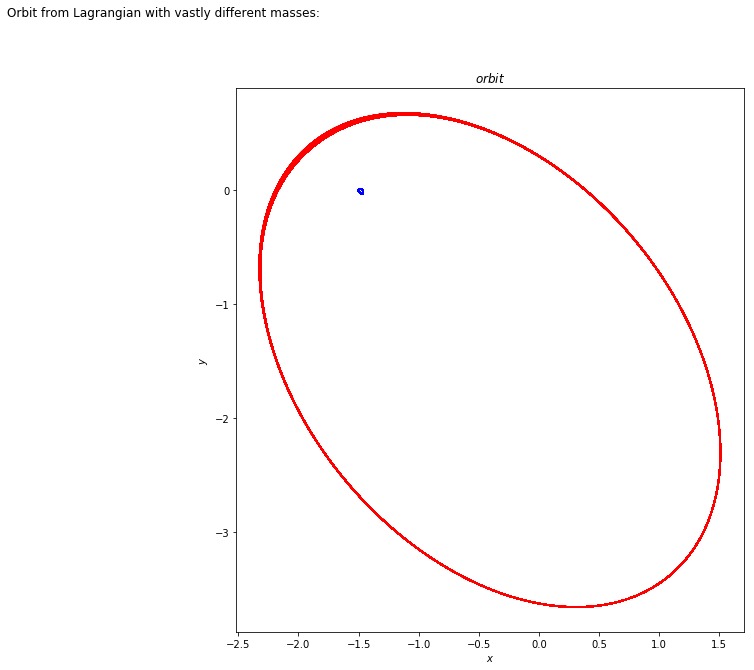

In [16]:
#initial conditions for second plot
x1_0= -1.5
x1_dot_0 = 0.01
x2_0 = 1.5
x2_dot_0 = -(m1/m2) * x1_dot_0
y1_0 = 0.0
y1_dot_0 = 0.1
y2_0 = -2.5
y2_dot_0 = -(m1/m2) * y1_dot_0
x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = O1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)


#plotting
fig = plt.figure(figsize=(20,10))
overall_title = 'Orbit from Lagrangian with vastly different masses:  '
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta vs time plot 
ax_a = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop],
            axis_labels=x_vs_y_labels,
            color='blue',
            label=None, 
            title=r'$orbit$', 
            ax=ax_a)  
plot_y_vs_x(x2[start : stop], y2[start : stop],
            axis_labels=x_vs_y_labels,
            color='red',
            label=None, 
            title=r'$orbit$', 
            ax=ax_a)

Here we can see our smaller mass orbiting around our larger mass. While the larger mass is still technically moving, its' movements are so much smaller compared to the smaller mass that they are hard to see on this plot. This is somewhat comparitive to the earth-sun relation.